<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E} }
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 4

_**Group Members:**_ Jai Kasera, Mayur Sekhar, Rithvik Neti

### Problem 0 (3 points)

## Part 1: Intuition and Dimensionality 

In [2]:
import numpy as np


def standardize(s, mean, variance):
    return (s - mean) / np.sqrt(variance)

In [3]:
rng = np.random.default_rng(1)
e = np.exp(1)

densities = [
    lambda n, d: standardize(rng.beta(a=1, b=1, size=(n, d)), 1/2, 1/12),
    lambda n, d: standardize(rng.exponential(scale=1, size=(n, d)), 1, 1),
    lambda n, d: standardize(rng.lognormal(size=(n, d)), 1/2, (e - 1) * e),
    lambda n, d: rng.normal(size=(n, d)),
    lambda n, d: standardize(rng.uniform(size=(n, d)), 1/2, 1/12),
    lambda n, d: standardize(rng.wald(1, 1, size=(n, d)), 1, 1)
]

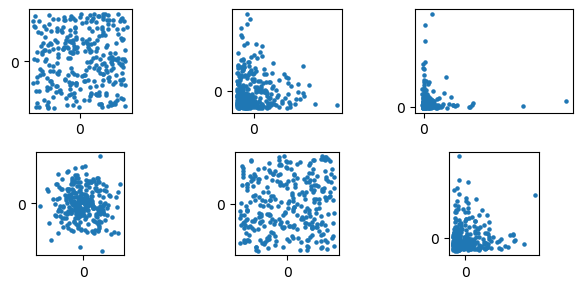

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline


n, d = 300, 2

ax = plt.subplots(2, 3, figsize=(7, 3), tight_layout=True)[1]

k = 0
for r in range(2):
    for c in range(3):
        s = densities[k](n, d)
        a = ax[r, c]
        a.scatter(s[:, 0], s[:, 1], s=5)
        a.set_xticks([0])
        a.set_yticks([0])
        a.set_aspect(1)
        k += 1

### Problem 1.1 (Exam Style)

The variance is defined as:

$Variance(X) = E[X]^2 + E[X^2]$

Since we know that the x is a zero mean and that it is unit variance:

$Variance(X) = 1$

$E[X] = 0$ so $E[X]^2 = 0$

$\therefore E[X^2] = 1$

The Euclidean norm formula for X in d dimensions is:

$\Vert X \Vert^2 = X_1^2 + X_2^2 + ...... + X_d^2$

$\therefore E[\Vert X \Vert^2] = E[X_1^2] + E[X_2^2] + ....... + E[X_d^2]$

Given that we know $E[X^2] = 1$ and $E[\Vert X \Vert^2]$ is summed d times:

$E[\Vert X \Vert^2] = d$

Given Jensen's inequality:

$E[\Vert x \Vert] \approx \sqrt{E[\Vert x \Vert ^2]}$

$\therefore E[\Vert X \Vert] = \sqrt{d}$

The value of m(d) with thsi equation is $m(d) = \sqrt{d}$, and based on the observation of the charts above, the standard deviation appears to be a constant that will vary based on distributions and varies parameters, but it is not dependent on the d. Our intiution does not carry, and there is indeed a gap between the origin and the data for large values for d. As seen in the equation the m(d) increase as there is an increase in the dimensions leading to this gap. For a large d, most of the points in this case would be on some hyperplane that has points around the same distance of $\sqrt{d}$ from the origin with a thickness of that border being the constant standard deviation of that specific instance. As there is a large d, there is a gap between the origin and the points as previously described which leads to most of the points being around that with a distance of $\sqrt{d}$.

### Problem 1.2

In [5]:
n, d = 10000, 16
norm_total_samples = 0
avgs = []
normtot = []
print("d = 16:")
for i in range(6):
    j = i + 1
    print()
    print(j)
    s = densities[i](n, d)
    norms = np.linalg.norm(s, axis=1)
    avg = np.mean(norms)
    norm_total_samples += avg
    avgs.append(avg)
    normtot.append(norms)
    print(f"Empirical Average: {round(avg, 4)}")
    print(f"The Ratio as a Percentage: {round(np.std(norms)*100/avg, 2)}%")
    print()
aaverages = norm_total_samples / 6
std_dev = np.std(np.array(norms))
ratio= (std_dev / aaverages) * 100

# Output the results
print()
print("TOTAL:")
print(f"Empirical Average: {round(aaverages, 4)}")
print(f"The Ratio as a Percentage: {round(ratio, 2)}%")

d = 16:

1
Empirical Average: 3.976
The Ratio as a Percentage: 11.34%


2
Empirical Average: 3.8001
The Ratio as a Percentage: 31.84%


3
Empirical Average: 3.9266
The Ratio as a Percentage: 59.41%


4
Empirical Average: 3.9354
The Ratio as a Percentage: 17.68%


5
Empirical Average: 3.9777
The Ratio as a Percentage: 11.34%


6
Empirical Average: 3.6922
The Ratio as a Percentage: 41.94%


TOTAL:
Empirical Average: 3.8846
The Ratio as a Percentage: 39.86%


In [6]:
n, d = 10000, 100
norm_total_samples = 0
avgs = []
normtot = []
print("d = 100:")
for i in range(6):
    j = i + 1
    print()
    print(j)
    s = densities[i](n, d)
    norms = np.linalg.norm(s, axis=1)
    avg = np.mean(norms)
    norm_total_samples += avg
    avgs.append(avg)
    normtot.append(norms)
    print(f"Empirical Average: {round(avg, 4)}")
    print(f"The Ratio as a Percentage: {round(np.std(norms)*100/avg, 2)}%")
    print()
aaverages = norm_total_samples / 6
std_dev = np.std(np.array(norms))
ratio= (std_dev / aaverages) * 100

# Output the results
print()
print("TOTAL:")
print(f"Empirical Average: {round(aaverages, 4)}")
print(f"The Ratio as a Percentage: {round(ratio, 2)}%")

d = 100:

1
Empirical Average: 9.9897
The Ratio as a Percentage: 4.47%


2
Empirical Average: 9.9092
The Ratio as a Percentage: 13.74%


3
Empirical Average: 10.8512
The Ratio as a Percentage: 29.46%


4
Empirical Average: 9.9729
The Ratio as a Percentage: 7.15%


5
Empirical Average: 9.9928
The Ratio as a Percentage: 4.51%


6
Empirical Average: 9.81
The Ratio as a Percentage: 19.59%


TOTAL:
Empirical Average: 10.0876
The Ratio as a Percentage: 19.05%


In [7]:
n, d = 10000, 1600
norm_total_samples = 0
avgs = []
normtot = []
print("d = 1600:")
for i in range(6):
    j = i + 1
    print()
    print(j)
    s = densities[i](n, d)
    norms = np.linalg.norm(s, axis=1)
    avg = np.mean(norms)
    norm_total_samples += avg
    avgs.append(avg)
    normtot.append(norms)
    print(f"Empirical Average: {round(avg, 4)}")
    print(f"The Ratio as a Percentage: {round(np.std(norms)*100/avg, 2)}%")
    print()
aaverages = norm_total_samples / 6
std_dev = np.std(np.array(norms))
ratio= (std_dev / aaverages) * 100

# Output the results
print()
print("TOTAL:")
print(f"Empirical Average: {round(aaverages, 4)}")
print(f"The Ratio as a Percentage: {round(ratio, 2)}%")

d = 1600:

1
Empirical Average: 39.9936
The Ratio as a Percentage: 1.11%


2
Empirical Average: 39.9588
The Ratio as a Percentage: 3.54%


3
Empirical Average: 45.0209
The Ratio as a Percentage: 9.74%


4
Empirical Average: 39.9923
The Ratio as a Percentage: 1.74%


5
Empirical Average: 39.9911
The Ratio as a Percentage: 1.12%


6
Empirical Average: 39.9135
The Ratio as a Percentage: 5.12%


TOTAL:
Empirical Average: 40.8117
The Ratio as a Percentage: 5.01%


1. Yes, the empirical averages are consitent with the analysis above. Based on that, the empirical averages for the norms or the distances should be about the square root of d, and this is what was shown through the data. For d = 16, all the averages and the average of the average was all around 4 which is the square root of 16. The same occurs for d = 100 with an average of 10, and d =  1600 with an average of around 40 which means that the empirical data is consistent with the result of the statistical mean.

2. Yes, the ratios of the standard deviation over the mean tend to decrease with the increasing of d. This can be seen in the data as the ratio when d = 16 tends to be much greater than that of d = 100 and d = 1600 with averages being around 40 to 18 to 5 percent as there is an increase in d.

## Part 2: Stochastic Risk Minimization and The Bayes Classifier

### Problem 2.1 (Exam Style)

1. What is the Bayes classifier $h^*$ for the ramp data model?

The Bayes classifier is defined as the classifier that maximizes the posterior probability $p(y|x)$. Given two labels $0$ and $1$, we need to compare the conditional densities $p(x|0)$ and $p(x|1)$ to determine the decision boundary for the classifier.

$p(x|0)$ decays linearly from $b$ to 0 as $x$ varies from 0 to $b = \frac{1}{2} + \epsilon$.

$p(x|1)$ increases linearly from $0$ to $a = \frac{1}{2} - \epsilon$ to 1.

To find the decision rule $h^*(x)$, we compare the two conditional probabilities:

$
h^*(x) = 
\begin{cases} 
0 & \text{if } p(x|0) > p(x|1) \\
1 & \text{if } p(x|1) > p(x|0)
\end{cases}
$

By the graph:

$
h^*(x) = 
\begin{cases} 
0 & \text{if } x<\frac{1}{2} \\
1 & \text{if } x>\frac{1}{2}
\end{cases}
$

The decision boundary will occur where the two conditional probabilities are equal. Solving $p(x|0) = p(x|1)$ will give you the exact point that splits the two regions.
   
2. What is the Bayes risk $L^*$ for the ramp data model?

The Bayes optimal error rate, denoted as $L^*$, is the expected probability of making an incorrect prediction:

$
L^* = \mathbb{E}[\hat{y} \neq y]
$

Using the linearity property of expected values, we can split this into the sum of two cases:

$
L^* = \mathbb{E}[\hat{y} = 0, y = 1] + \mathbb{E}[\hat{y} = 1, y = 0]
$

The first term corresponds to the case where we predict $\hat{y} = 0$ but the true label is $y = 1$, and this occurs over the interval from \(x = a\) to $x = \frac{1}{2}$, based on the conditional probability distribution $p(x \mid y = 1)$. 

The second term describes when $\hat{y} = 1$ but the true label is $y = 0$, which is the interval from $x = \frac{1}{2}$ to $x = b$ for the distribution $p(x \mid y = 0)$.

Since expected value over a continuous range is computed through integration, we can express the error as:

$
L^* = \int_{a}^{\frac{1}{2}} p(x, y=1) \, dx + \int_{\frac{1}{2}}^{b} p(x, y=0) \, dx
$

Using conditional probabilities, this becomes:

$
L^* = \int_{a}^{\frac{1}{2}} p(x \mid y=1) \cdot p(y=1) \, dx + \int_{\frac{1}{2}}^{b} p(x \mid y=0) \cdot p(y=0) \, dx
$

Since the prior probabilities are equal, $p(y=1) = \frac{1}{2}$ and $p(y=0) = \frac{1}{2}$, we can simplify the expression to:

$
L^* = \int_{a}^{\frac{1}{2}} \frac{1}{2} p(x \mid y=1) \, dx + \int_{\frac{1}{2}}^{b} \frac{1}{2} p(x \mid y=0) \, dx
$

Due to the symmetry of the problem, we can conclude that both regions contribute equally to the error, so:

$
L^* = 2 \times \int_{a}^{\frac{1}{2}} \frac{1}{2} p(x \mid y=1) \, dx
$

We model $p(x \mid y = 1)$ as a linear function of the form $c(x - a)$, where $c$ is a constant and the function has an intercept at $x = a$. 

Thus, we have:

$
L^* = 2 \times \int_{a}^{\frac{1}{2}} \frac{1}{2} \cdot c(x - a) \, dx
$

Now, we solve for $c$ by normalizing the distribution:

$
\int_{a}^{1} c(x - a) \, dx = 1
$

Carrying out the integration:

$
c \int_{a}^{1} (x - a) \, dx = c \left[ \frac{1}{2} (x - a)^2 \right]_{a}^{1} = 1
$

Evaluating the integral:

$
c \cdot \frac{1}{2} (1 - a)^2 = 1
$

Thus, the constant is:

$
c = \frac{2}{(1 - a)^2}
$

Substituting this back into the integral for $L^*$:

$
L^* = 2 \times \int_{a}^{\frac{1}{2}} \frac{1}{(1 - a)^2} (x - a) \, dx
$

Factoring out the constant:

$
L^* = \frac{2}{(1 - a)^2} \int_{a}^{\frac{1}{2}} (x - a) \, dx
$

Now, performing the integration:

$
L^* = \frac{2}{(1 - a)^2} \left[ \frac{1}{2} (x - a)^2 \right]_{a}^{\frac{1}{2}}
$

Evaluating this expression:

$
L^* = \frac{2}{(1 - a)^2} \cdot \frac{1}{2} \left(\frac{1}{2} - a\right)^2 = \frac{1}{(1 - a)^2} \left(\frac{1}{2} - a\right)^2
$

Finally, substituting $a = \frac{1}{2} - \epsilon$:

$
L^* = \frac{\epsilon^2}{\left(1 - \left(\frac{1}{2} - \epsilon\right)\right)^2} = \frac{\epsilon^2}{\frac{3}{4} + \epsilon - \epsilon^2}
$


3. Give the numerical value of the Bayes risk $L^*$ for the case $\epsilon = \frac{1}{2}$.
For $\epsilon = \frac{1}{2}$, the ramp model becomes linearly separable, and the Bayes classifier will not make any mistakes. Thus, the Bayes risk in this case is:

$L^* = \frac{\epsilon^2}{\frac{3}{4} + \epsilon - \epsilon^2}$
$\Rightarrow$
$\frac{\frac{1}{2}^2}{\frac{3}{4} + \frac{1}{2} - \frac{1}{2}^2}$

$ L^* = \frac{\frac{1}{4}}{1}$

$ L^* = \frac{1}{4}$

4. Plot the Bayes risk $L^*$ as a function of $\epsilon$ for $0\leq\epsilon\leq\frac{1}{2}$.

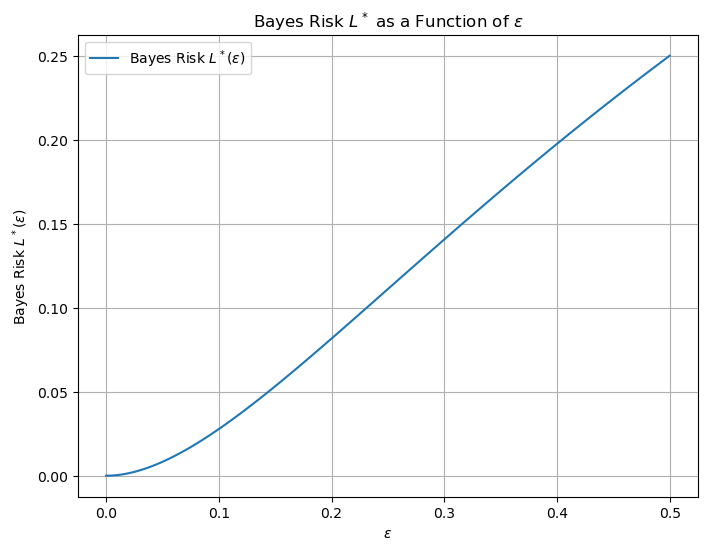

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def p_x_given_0(x, b):
    return 2 * (b - x) / b**2 if 0 <= x <= b else 0

def p_x_given_1(x, a):
    return 2 * (x - a) / (1 - a)**2 if a <= x <= 1 else 0

def find_decision_boundary(a, b):
    return (a * b**2 + b * (1 - a)**2) / (b**2 + (1 - a)**2)

def bayes_risk(eps):
    a = 0.5 - eps
    b = 0.5 + eps
    
    x_boundary = find_decision_boundary(a, b)
    
    P_0_misclass = quad(p_x_given_0, x_boundary, b, args=(b,))[0]
    P_1_misclass = quad(p_x_given_1, a, x_boundary, args=(a,))[0]
    
    return 0.5 * (P_0_misclass + P_1_misclass)

eps_values = np.linspace(0, 0.5, 100)

bayes_risks = [bayes_risk(eps) for eps in eps_values]

plt.figure(figsize=(8, 6))
plt.plot(eps_values, bayes_risks, label=r'Bayes Risk $L^*(\epsilon)$')
plt.title(r"Bayes Risk $L^*$ as a Function of $\epsilon$")
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Bayes Risk $L^*(\epsilon)$')
plt.grid(True)
plt.legend()
plt.show()

## Part 3: Regularization and Validation 

### Problem 3.1

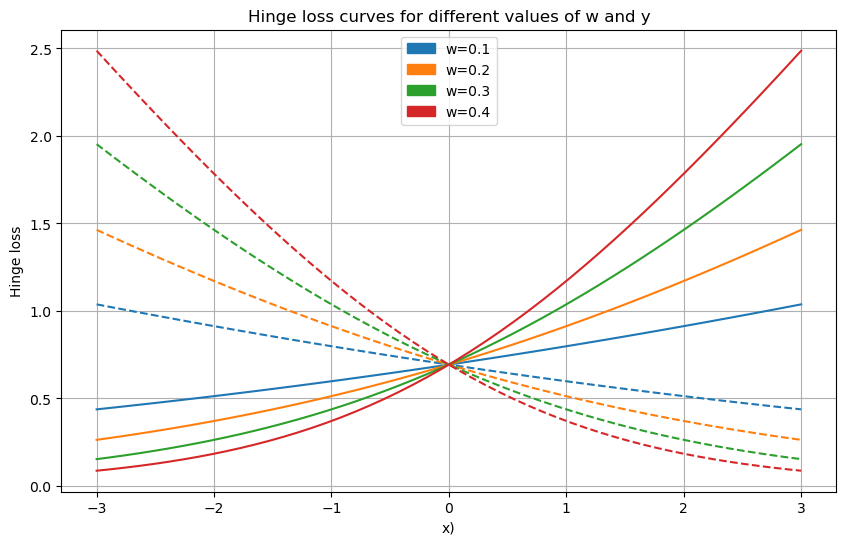

In [9]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches



def hinge_loss(y,x,w): 

    a1 = -w*x 
    a2 = w*x
    log_expression = np.log(np.exp(a1) + np.exp(a2)) 
    if y==1: 
        return log_expression - a1
    else:
        return log_expression - a2 

y_values = [1,2]
w_values = [0.1, 0.2, 0.3, 0.4]
x_values = np.linspace(-3,3) 

plt.figure(figsize=(10, 6))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
color_i = 0
patches = [] 

for w in w_values:
    patches.append(mpatches.Patch(color=colors[color_i], label = f'w={w}'))
    female_patch = mpatches.Patch(color='red', label='Female')
    for y in y_values:
        

        losses = [hinge_loss(y, x, w) for x in x_values]
        
        if y == 1:
            plt.plot(x_values, losses, c = colors[color_i], \\
                     label=f"w = {w}", linestyle='-')
        else:
            plt.plot(x_values, losses, c= colors[color_i], \\
                     label=f"w = {w}", linestyle='--')


    color_i +=1 

plt.legend(handles = patches, loc="upper center")
plt.grid(True)
plt.title("Hinge loss curves for different values of w and y")
plt.xlabel("x)")
plt.ylabel("Hinge loss")

plt.show()

### Problem 3.2 (Exam Style)

1. 

The risk $L_t(w)$ is a decreasing function of $w$. We can see from the plot above that as the value of w increases, the gap between the two activation functions $a_1(x)$ and $a_2(x)$ increases. This is because the model's confidence is increasing as the $w$ grows, leading to a lower risk.

2. 

$L_t(\infty) = lim_{w\rightarrow \infty}L_t(w) = 0$ 

As $w \rightarrow \infty$, the gap between the two activation functions $a_1(x) = -wx$ and $a_2(x) = wx$ becomes infinitely large. This is because as $w \rightarrow \infty$, $a_1(x) \rightarrow \infty$ and $a_2(x) \rightarrow -\infty$, resulting in a loss of 0. For points on the correct side of the decision boundary, the activation for the correct label becomes overwhelmingly larger than that of the incorrect label. This drives the hinge loss to 0, as the correct label's activation dominates the incorrect one in the loss function. 



### Problem 3.3: Regularization

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from types import SimpleNamespace

digits = datasets.load_digits()
x, x_test, y, y_test = train_test_split(
    digits.data, digits.target, test_size=797,
    random_state=3, shuffle=True, stratify=digits.target
)
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=800,
    random_state=3, shuffle=True, stratify=y
)
mnist = SimpleNamespace(
    train=SimpleNamespace(x=x_train, y=y_train),
    validate=SimpleNamespace(x=x_val, y=y_val),
    test=SimpleNamespace(x=x_test, y=y_test)
)

msg = 'set sizes: T {}, V {}, S {}'
print(msg.format(len(mnist.train.y), len(mnist.validate.y), len(mnist.test.y)))

set sizes: T 200, V 800, S 797


In [11]:
from sklearn.linear_model import LogisticRegression

def softmax_classifier(t, c):
    return LogisticRegression(C=c, max_iter=1000, random_state=3).fit(t.x, t.y)

In [ ]:
def validation(c_set, t, v):  
    best_loss = 0
    acc = {} 
    best = [None, None, best_loss]

    for c in c_set:
        
        model = softmax_classifier(t, c) 

        loss = model.score(v.x, v.y)
        acc[c] = loss
        if loss > best[2]: 
            best[0], best[1], best[2] = model, c, loss 
            
         
    return best[0], best[1], acc

In [13]:
c_set = np.linspace(0.0002, 1, 30) 
best_h, best_c, acc = validation(c_set, mnist.train, mnist.validate)


Text(0, 0.5, 'Accuracy')

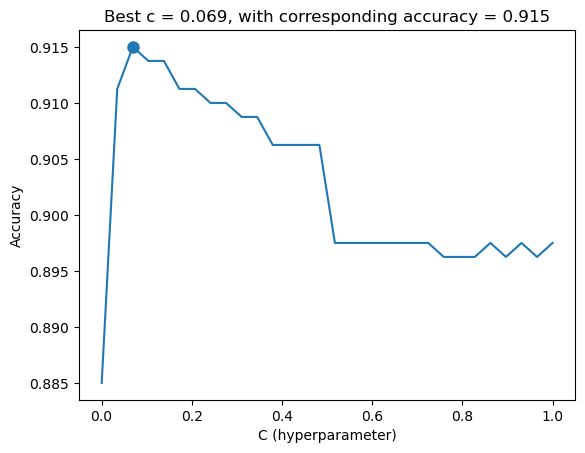

In [14]:
from matplotlib import pyplot as plt

plt.plot(acc.keys(), acc.values()) 
plt.title(f'Best c = {best_c:.3f}, \\
    with corresponding accuracy = {acc[best_c]:.3f}')
plt.scatter(best_c, acc[best_c], linewidths=3)
plt.xlabel("C (hyperparameter)")
plt.ylabel("Accuracy")

In [15]:
test_accuracy = best_h.score(mnist.test.x, mnist.test.y)
print(f'Test accuracy on mnist.test: {test_accuracy:.3f}')

Test accuracy on mnist.test: 0.925


In [30]:
tv = SimpleNamespace(x=np.vstack((mnist.train.x, mnist.validate.x)), \\
                     y=np.hstack((mnist.train.y, mnist.validate.y)))
h_comb = softmax_classifier(tv, best_c)
test_accuracy = h_comb.score(mnist.test.x, mnist.test.y) 
validation_accuracy = h_comb.score(mnist.validate.x, mnist.validate.y) 
print(f"Test accuracy on mnist.test: {test_accuracy:.3f}")
print(f"Validation accuracy on mnist.validate: {validation_accuracy:.3f}")


Test accuracy on mnist.test: 0.959
Validation accuracy on mnist.validate: 1.000


Validation did help relative to the baseline performance printed earlier, since the test accuracy with validation as 95.9% as opposed to 
92.5% without validation. 

Yes, combining the training and validation sets helps. When the model is retrained on the larger combined dataset (tv), it can learn from more data, which generally improves its ability to generalize to unseen data.

In this experiment, combining the training and validation sets helps more than just performing validation alone. This is likely because increasing the amount of training data improves the model's ability to capture the underlying patterns in the data, resulting in better generalization to the test set.

### Problem 3.4 (Exam Style)

Because h_comb was trained on a dataset that included both mnist.training and mnist.validate. This means that we trained h_comb on the validation data, which means that even though there was 100% validation accuracy, it is misleading because we used that same data when training the model. 

## Part 4: The Bootstrap 

### Problem 4.1 (Exam Style)


#### 1. 
A: event that sample is not used in 1 bag

$(P(A))^K = (1-p)^K$

#### 2. 
1 - P(sample is not used in any of the K bags) = $1- (1-p)^K$

#### 3.
1 - P(sample is used in all K bags) = $1-p^K$

### Problem 4.2

In [31]:
def sampler(t): 
    n = len(t.x) 
    bag_indices = np.random.choice(n, size=n, replace=True) 
    val_indices = np.setdiff1d(np.arange(n), bag_indices)
    b_x = t.x[bag_indices]
    b_y = t.y[bag_indices]
    v_x = t.x[val_indices]
    v_y = t.y[val_indices]

    bag = SimpleNamespace(x=b_x, y=b_y)
    validation = SimpleNamespace(x=v_x, y=v_y)
    
    return bag, validation 


def bootstrap(c_set, t, k):
    best_loss = 0
   

    for c in c_set:
        c_loss_total = 0
        
        for i in range (k): 
            b, v = sampler(t) 
            model = softmax_classifier(b,c) 
            loss = model.score(v.x, v.y)
            c_loss_total +=loss

        c_loss_avg = c_loss_total/k
        if c_loss_avg > best_loss: 
            best_loss = c_loss_avg 
            best_c = c

    best_model = softmax_classifier(t, best_c) 
    return best_model, best_c


In [32]:
tv = SimpleNamespace(x=np.vstack((mnist.train.x, mnist.validate.x)), \\
                     y=np.hstack((mnist.train.y, mnist.validate.y)))

h_best, best_c = bootstrap(c_set, tv, 15)

In [33]:
print(f'Best c: {best_c:.3f}')
train_accuracy = h_best.score(tv.x, tv.y)
test_accuracy = h_best.score(mnist.test.x, mnist.test.y)
print(f'Training accuracy on tv: {train_accuracy:.3f}')
print(f'Test accuracy on mnist.test: {test_accuracy:.3f}')

Best c: 0.586
Training accuracy on tv: 1.000
Test accuracy on mnist.test: 0.960


The predictor has a 100% accuracy on training data and ~96% accuracy on the test data, which signifies that it is pretty accurate. The model might be overfitting slightly, since the accuracy on the training data is more than the accuracy on the test data. However, a 96% accuracy on the test data is quite high, so even if the model is slightly overfitting it is not causing drastic results. 

The predictor was trained 301 times in the call of bootstrap. The predictor was trained k times for every value of c --> predictor was trained with k=15 different selections of bags/validation sets for each value of c, and then trained a last time with the best value of the hyperparameter for the whole training set. There are 30 values for c, so we get 30*15 +1 = 301 times. 